### The aim of the project is to develop a model that can predict and analyze public transport fares based on distance, which can help individuals who are not familiar with fare amounts in a city to determine the actual fare.


In [1]:
import pandas as pd
import numpy as np

In [2]:
train1 = pd.read_csv(r"C:\Users\pawar\Videos\project\train.csv", nrows=50000)

In [3]:
train1

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,2013-06-12 23:25:15.0000004,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,2015-06-22 17:19:18.0000007,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,2011-01-30 04:53:00.00000063,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,2012-11-06 07:09:00.00000069,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


## DATA EXPLORATION

In [4]:
train1.shape


(50000, 8)

In [5]:
train1.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [6]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                50000 non-null  object 
 1   fare_amount        50000 non-null  float64
 2   pickup_datetime    50000 non-null  object 
 3   pickup_longitude   50000 non-null  float64
 4   pickup_latitude    50000 non-null  float64
 5   dropoff_longitude  50000 non-null  float64
 6   dropoff_latitude   50000 non-null  float64
 7   passenger_count    50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [7]:
train1.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


 Median. The median is the midpoint of the data set. This midpoint value is the point at 
 which half the observations(50 percent) are above the value and half the observations(50 percent) are below the value.
 8.5 is not above or below it is central value
 50 percent of your data is below 8.5
 suppose I have data from 1 to 10 rating of some product [1.2,1.3,5.7,8.5,8.5,8.8,8.8]
 the median will be 8.5
 we are the comparing the data of one side of the median with another side of the median

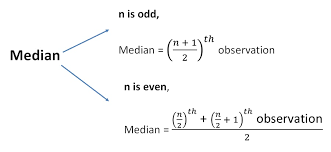

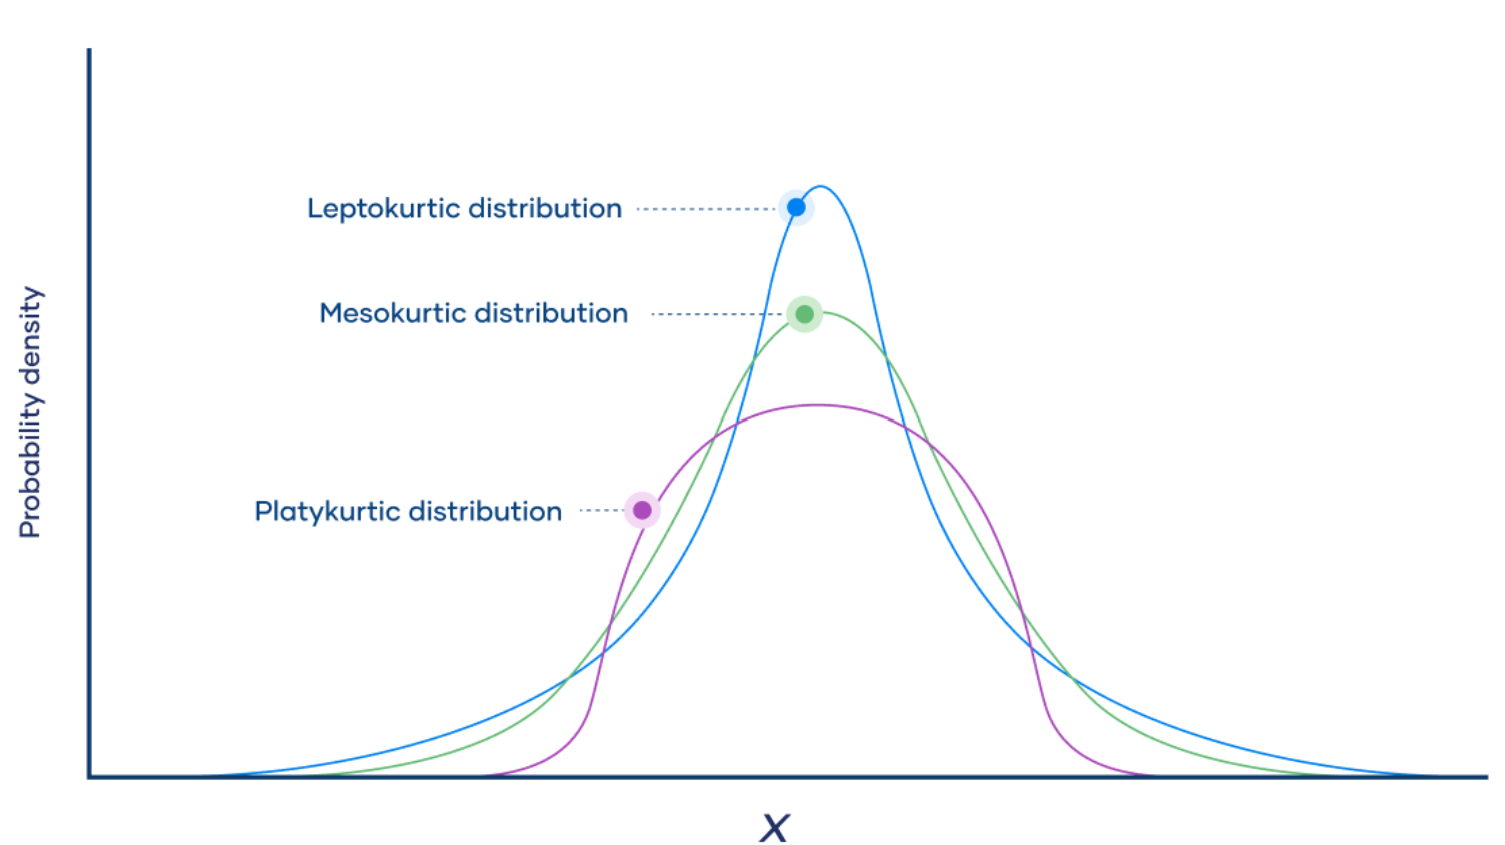

train1["pickup_datetime"]=train1.pickupdatetime.astype(DateTime)


train1.pickupdatetime.astype(DateTime) is an error
because that the astype() method is not recognized 
as a valid method for converting the data type of a column to datetime.

Assuming you're using Python and pandas, one possible solution is to use the  **pd.to_datetime()**
method instead of astype() to convert 
the data type of the pickupdatetime column to datetime:

In [8]:
train1["pickup_datetime"]= pd.to_datetime(train1["pickup_datetime"])

In [9]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                50000 non-null  object             
 1   fare_amount        50000 non-null  float64            
 2   pickup_datetime    50000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   50000 non-null  float64            
 4   pickup_latitude    50000 non-null  float64            
 5   dropoff_longitude  50000 non-null  float64            
 6   dropoff_latitude   50000 non-null  float64            
 7   passenger_count    50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 3.1+ MB


isnull() is a pandas DataFrame method that returns a DataFrame of the same shape as train1,
with True values in places where train1 has missing (null or NaN) 
values, and False values when not having null.

In [10]:
train1.isnull()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
49995,False,False,False,False,False,False,False,False
49996,False,False,False,False,False,False,False,False
49997,False,False,False,False,False,False,False,False
49998,False,False,False,False,False,False,False,False


In [11]:
train1.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

sum() is another pandas DataFrame method that returns the sum of values for each column 
in the DataFrame. Since True values are interpreted as 1 and False values as 0, the sum of 
missing values for each column is simply the sum of True values in that column.


False = 0(not having null/NaN)
True = 1 (HAVING NULL,YES ITS TRUE IT IS NULL)

## we have a negligible number of null entries. It is better to eliminate them.


In [12]:
train1 = train1.dropna()

In [13]:
train1.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [14]:
train1_skew = train1.select_dtypes(include=['number']).skew()

print(train1_skew)

fare_amount          3.562101
pickup_longitude     7.014435
pickup_latitude     -3.478584
dropoff_longitude    7.002893
dropoff_latitude    -8.189175
passenger_count      2.010222
dtype: float64


#### plt.figure() is a function in the matplotlib.pyplot module that creates a new figure window to plot data in.

When you call plt.figure(), a new empty figure window is created. You can then add subplots or other plot
elements to this figure 
using other pyplot functions like plt.plot(), plt.scatter(), plt.hist(), plt.boxplot(), and so on.

You can also specify parameters to plt.figure() to control the size, aspect ratio,
and other properties of the new figure. For example, you can use plt.figure(figsize=(8,6))
to create a new figure with width 8 inches and height 6 inches.

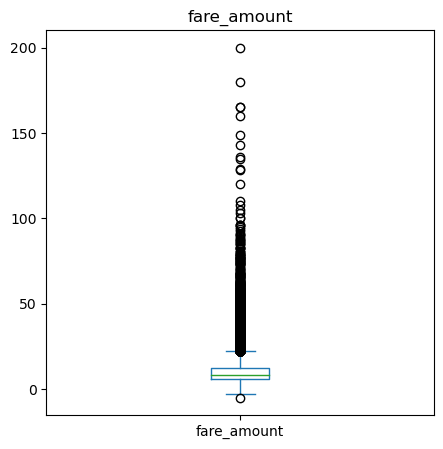

In [15]:
import matplotlib.pyplot as plt

# for col in train1.columns:
plt.figure()
train1['fare_amount'].plot(kind='box', figsize=(5,5)) 
plt.title('fare_amount')
plt.show()
# train1.plot(kind='box', subplots=True, layout=(16,2), sharex=False, sharey=False,figsize=(20, 40))
# plt.show()


In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# + pickup_hour + pickup_date + pickup_month + pickup_day + year + distance'
model_formula = 'fare_amount ~ pickup_longitude + pickup_latitude + dropoff_longitude + dropoff_latitude + passenger_count' 

model = ols(model_formula, data=train1).fit()
model1 = sm.stats.anova_lm(model)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.760
Date:                Wed, 19 Jul 2023   Prob (F-statistic):            0.00209
Time:                        11:34:35   Log-Likelihood:            -1.8447e+05
No. Observations:               50000   AIC:                         3.689e+05
Df Residuals:                   49994   BIC:                         3.690e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            11.4449      0.318     36.017      0.000      10.822      12.068
pickup_longitude      0.0081      0.019      0.421      0.674      -0.030       0.046
pickup_latitude      -0.0186      0.025     -0.741      0.459      -0.068       0.031
dropoff_longitude    -0.0327      0.026     -1.243      0.214      -0.084       0.019
dropoff_latitude     -0.0333      0.043     -0.771      0.441      -0.118       0.051
passenger_count       0.1244      0.034      3.703      0.000       0.059       0.190
==============================================================================
Omnibus:                    39141.644   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1166425.252
Skew:                           3.562   Prob(JB):                         0.00
Kurtosis:                      25.564   Cond. No.                         868.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
train1.duplicated().sum()

0

### The city of New York longitude ranges between -75 and -72. The latitude ranges between 40 and 42, SO:

In [18]:
BB = (-74.3,-73.0,40.6,41.7)

In [19]:
def select_within_boundingbox(train1,BB): 
    return ((train1['pickup_longitude']>=BB[0]) & (train1["pickup_longitude"] <= BB[1])&
           (train1['pickup_latitude']>=BB[2]) & (train1["pickup_latitude"] <= BB[3])&
           (train1['dropoff_longitude']>=BB[0]) & (train1["dropoff_longitude"] <= BB[1])&
           (train1['dropoff_latitude']>=BB[2]) & (train1["dropoff_latitude"] <= BB[3]))
          
# BB = (-74.3,73.0,40.6,41.7)

In [20]:
train1 = train1[select_within_boundingbox(train1,BB)]

In [21]:
len(train1)

48903

In [22]:
train1_skew = train1.select_dtypes(include=['number']).skew()

print(train1_skew)


fare_amount          3.485118
pickup_longitude     6.510844
pickup_latitude      3.662289
dropoff_longitude    5.121857
dropoff_latitude     1.912782
passenger_count      2.009387
dtype: float64


## Data Cleaning (EDA)

In [23]:
# train1.drop(train1[train1['fare_amount'] < 2.5].index, inplace = True)

In [24]:
# find the rows where fare_amount is less than 2.5
low_fares = train1[train1['fare_amount'] < 2.5]

# get the indices of these rows
low_fare_indices = low_fares.index
low_fare_indices
# drop the rows with these indices from the train1 DataFrame
train1.drop(low_fare_indices, inplace=True)

C:\Users\pawar\AppData\Local\Temp\ipykernel_10768\1002263697.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1.drop(low_fare_indices, inplace=True)


In [25]:
train1[train1['fare_amount']==0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [26]:
len(train1)

48894

In [27]:
train1[train1['dropoff_latitude']==0]


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [28]:
train1[train1['dropoff_longitude']==0]


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [29]:
train1[train1['passenger_count']>6]


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [30]:
# train1.drop(train1[train1['passenger_count'] > 5].index, inplace = True)
train1 = train1[train1['passenger_count'] <= 5]

# pickup extremes, min and max

In [31]:
print(train1["pickup_latitude"].min())
print(train1["pickup_longitude"].min())


40.60386
-74.29159545898438


In [32]:
print(train1["pickup_latitude"].max())
print(train1["pickup_longitude"].max())

41.65
-73.137393


### dropoff     min and max

In [33]:
print(train1["dropoff_latitude"].min())
print(train1["dropoff_longitude"].min())

40.60174179077149
-74.294613


In [34]:
print(train1["dropoff_latitude"].max())
print(train1["dropoff_longitude"].max())

41.543217
-73.137393


In [35]:
print(train1["dropoff_latitude"].max())
print(train1["dropoff_longitude"].max())

41.543217
-73.137393


In [36]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# + pickup_hour + pickup_date + pickup_month + pickup_day + year + distance'
model_formula = 'fare_amount ~ pickup_longitude + pickup_latitude + dropoff_longitude + dropoff_latitude + passenger_count' 

model = ols(model_formula, data=train1).fit()
model1 = sm.stats.anova_lm(model)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     3465.
Date:                Wed, 19 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:34:36   Log-Likelihood:            -1.6886e+05
No. Observations:               47919   AIC:                         3.377e+05
Df Residuals:                   47913   BIC:                         3.378e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.538e+04    119.644    128.514      0.000    1.51e+04    1.56e+04
pickup_longitude     86.7569      1.055     82.251      0.000      84.690      88.824
pickup_latitude     -59.8451      1.405    -42.588      0.000     -62.599     -57.091
dropoff_longitude    63.1253      1.099     57.454      0.000      60.972      65.279
dropoff_latitude    -45.1158      1.318    -34.241      0.000     -47.698     -42.533
passenger_count       0.0774      0.033      2.362      0.018       0.013       0.142
==============================================================================
Omnibus:                    38405.474   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3960224.945
Skew:                           3.226   Prob(JB):                         0.00
Kurtosis:                      47.066   Cond. No.                     3.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### FEATURE EXTRACTION

In [37]:
pickup_hour = train1['pickup_datetime'].dt.hour
train1['pickup_hour'] = pickup_hour

pickup_weekday = train1['pickup_datetime'].dt.day_name()
train1['pickup_weekday'] = pickup_weekday

pickup_month = train1['pickup_datetime'].dt.day
train1['pickup_month'] = pickup_month

pickup_day = train1['pickup_datetime'].dt.dayofweek
train1['pickup_day'] = pickup_day


year = train1['pickup_datetime'].dt.year
train1['year'] = year


In [38]:
train1

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_weekday,pickup_month,pickup_day,year
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,17,Monday,15,0,2009
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16,Tuesday,5,1,2010
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0,Thursday,18,3,2011
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4,Saturday,21,5,2012
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,7,Tuesday,9,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2013-06-12 23:25:15.0000004,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1,23,Wednesday,12,2,2013
49996,2015-06-22 17:19:18.0000007,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1,17,Monday,22,0,2015
49997,2011-01-30 04:53:00.00000063,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1,4,Sunday,30,6,2011
49998,2012-11-06 07:09:00.00000069,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2,7,Tuesday,6,1,2012


### DISTANCE IN MILES

In [39]:
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a)) # 2*R*asin...


train1['distance'] = distance(train1.pickup_latitude, train1.pickup_longitude, 
                                    train1.dropoff_latitude, train1.dropoff_longitude)

train1['KM'] = (1.609)*distance(train1.pickup_latitude, train1.pickup_longitude, 
                                    train1.dropoff_latitude, train1.dropoff_longitude)

In [40]:
train1

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_weekday,pickup_month,pickup_day,year,distance,KM
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,17,Monday,15,0,2009,0.640487,1.030544
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16,Tuesday,5,1,2010,5.250670,8.448327
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0,Thursday,18,3,2011,0.863411,1.389228
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4,Saturday,21,5,2012,1.739386,2.798672
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,7,Tuesday,9,1,2010,1.242218,1.998729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2013-06-12 23:25:15.0000004,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1,23,Wednesday,12,2,2013,3.069806,4.939318
49996,2015-06-22 17:19:18.0000007,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1,17,Monday,22,0,2015,0.543517,0.874519
49997,2011-01-30 04:53:00.00000063,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1,4,Sunday,30,6,2011,1.406341,2.262802
49998,2012-11-06 07:09:00.00000069,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2,7,Tuesday,6,1,2012,0.413364,0.665103


In [41]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47919 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                47919 non-null  object             
 1   fare_amount        47919 non-null  float64            
 2   pickup_datetime    47919 non-null  datetime64[ns, UTC]
 3   pickup_longitude   47919 non-null  float64            
 4   pickup_latitude    47919 non-null  float64            
 5   dropoff_longitude  47919 non-null  float64            
 6   dropoff_latitude   47919 non-null  float64            
 7   passenger_count    47919 non-null  int64              
 8   pickup_hour        47919 non-null  int64              
 9   pickup_weekday     47919 non-null  object             
 10  pickup_month       47919 non-null  int64              
 11  pickup_day         47919 non-null  int64              
 12  year               47919 non-null  int64      

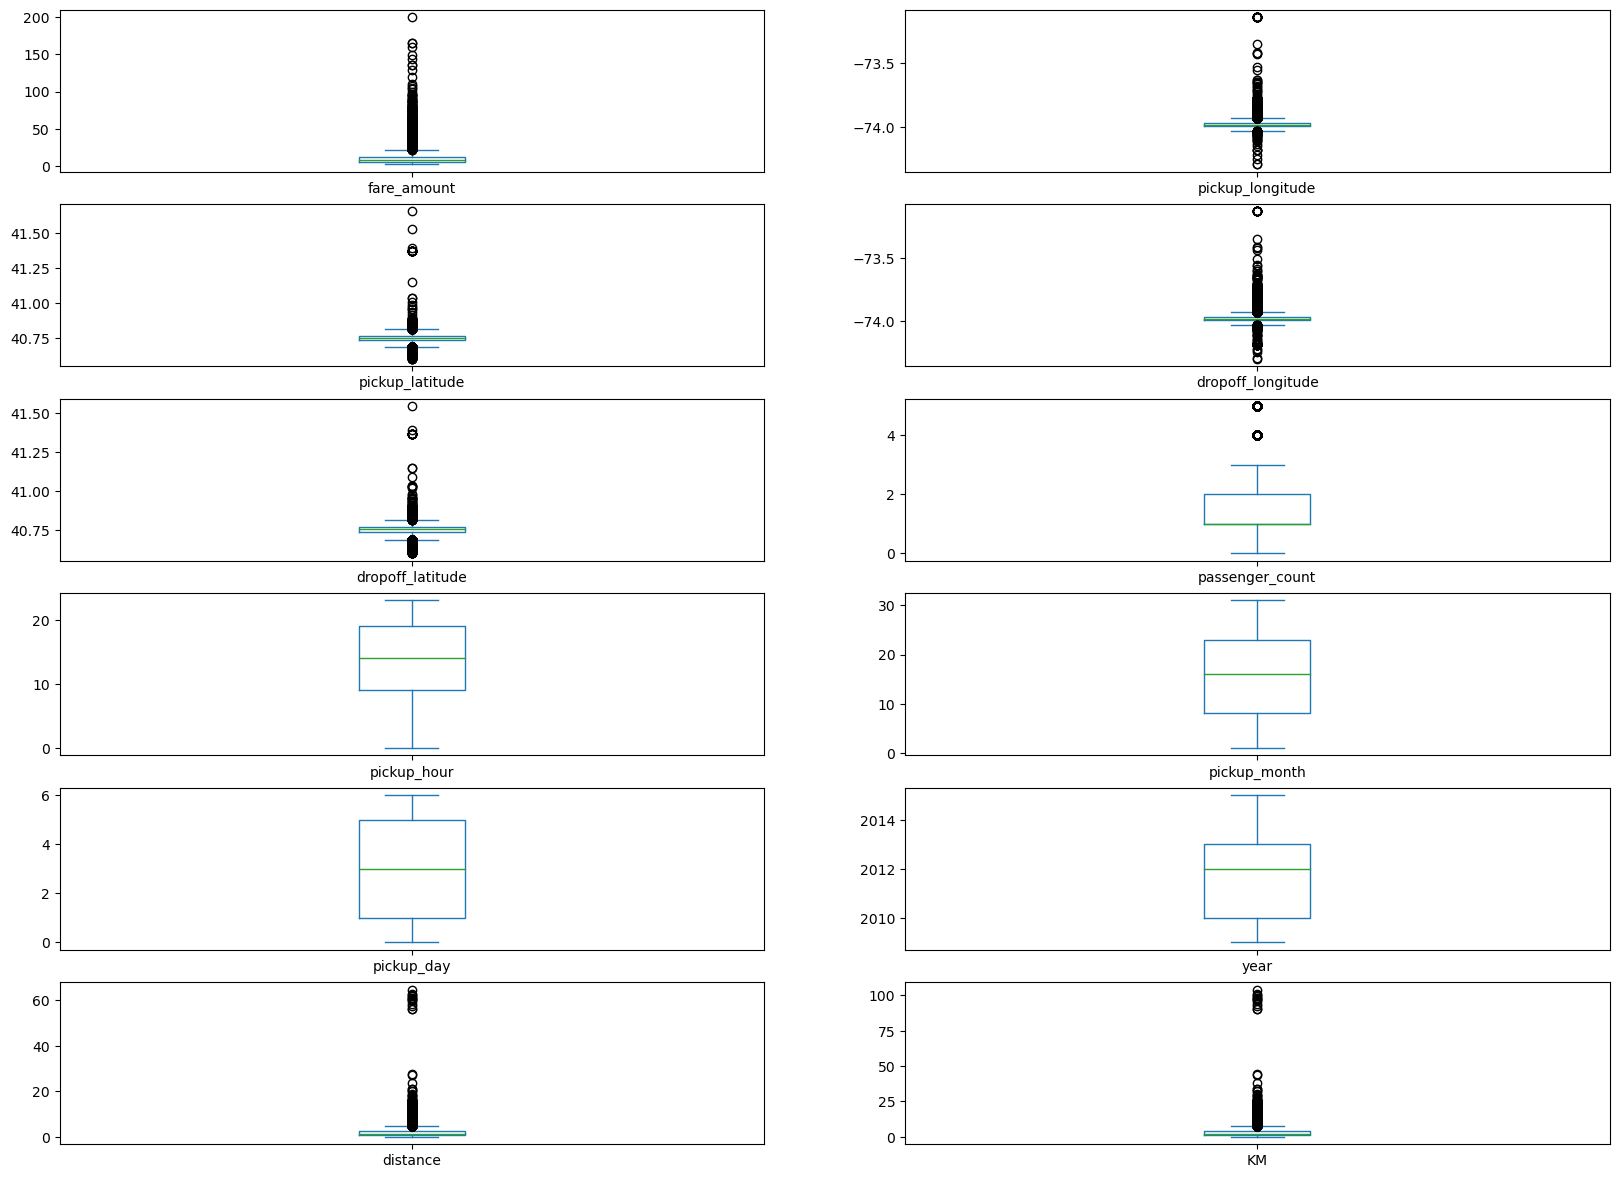

In [42]:
train1.plot(kind='box', subplots=True, layout=(16,2), sharex=False, sharey=False,figsize=(20, 40))
plt.show()

In [43]:
train1[train1['passenger_count']==0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_weekday,pickup_month,pickup_day,year,distance,KM
314,2015-06-02 23:16:15.00000012,34.0,2015-06-02 23:16:15+00:00,-73.974899,40.751095,-73.908546,40.881878,0,23,Tuesday,2,1,2015,9.679451,15.574237
566,2012-01-28 21:33:18.0000002,4.9,2012-01-28 21:33:18+00:00,-73.955322,40.782840,-73.955797,40.773673,0,21,Saturday,28,5,2012,0.633866,1.019890
678,2012-02-27 07:24:20.0000003,6.5,2012-02-27 07:24:20+00:00,-73.983397,40.738183,-73.971395,40.758023,0,7,Monday,27,0,2012,1.507914,2.426233
1160,2011-05-25 23:58:48.0000001,13.3,2011-05-25 23:58:48+00:00,-73.998360,40.740348,-73.946455,40.777348,0,23,Wednesday,25,2,2011,3.730247,6.001968
1935,2011-10-23 11:09:28.0000001,10.1,2011-10-23 11:09:28+00:00,-73.971400,40.795000,-73.967900,40.768600,0,11,Sunday,23,6,2011,1.833232,2.949670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47372,2012-04-03 22:57:10.0000003,15.7,2012-04-03 22:57:10+00:00,-73.988813,40.731228,-73.954773,40.733567,0,22,Tuesday,3,1,2012,1.789529,2.879352
47401,2012-03-08 12:41:22.0000007,9.7,2012-03-08 12:41:22+00:00,-73.991375,40.732217,-73.976507,40.758900,0,12,Thursday,8,3,2012,2.001162,3.219869
47920,2012-03-11 18:45:00.00000029,5.3,2012-03-11 18:45:00+00:00,-73.966112,40.794478,-73.953933,40.787287,0,18,Sunday,11,6,2012,0.807925,1.299951
48118,2011-03-25 19:56:28.0000008,8.1,2011-03-25 19:56:28+00:00,-73.973382,40.743915,-73.948883,40.777647,0,19,Friday,25,4,2011,2.660043,4.280009


In [44]:
train1.drop(train1[train1['passenger_count'] == 0].index, inplace = True)

In [45]:
train1[train1['passenger_count']==0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_weekday,pickup_month,pickup_day,year,distance,KM


In [46]:
train1[train1['distance']==0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_weekday,pickup_month,pickup_day,year,distance,KM
105,2009-03-25 00:08:52.0000001,52.00,2009-03-25 00:08:52+00:00,-74.035839,40.747320,-74.035839,40.747320,1,0,Wednesday,25,2,2009,0.0,0.0
191,2014-01-08 21:55:58.0000006,6.50,2014-01-08 21:55:58+00:00,-73.998488,40.726303,-73.998488,40.726303,1,21,Wednesday,8,2,2014,0.0,0.0
270,2012-08-25 01:53:42.0000005,7.50,2012-08-25 01:53:42+00:00,-73.995892,40.746454,-73.995892,40.746454,1,1,Saturday,25,5,2012,0.0,0.0
290,2009-12-14 12:33:00.00000075,6.90,2009-12-14 12:33:00+00:00,-73.982432,40.745747,-73.982432,40.745747,1,12,Monday,14,0,2009,0.0,0.0
396,2014-03-12 18:12:44.0000006,12.00,2014-03-12 18:12:44+00:00,-73.844904,40.736318,-73.844904,40.736318,1,18,Wednesday,12,2,2014,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49721,2009-11-16 11:27:00.000000165,4.10,2009-11-16 11:27:00+00:00,-73.974603,40.762377,-73.974603,40.762377,5,11,Monday,16,0,2009,0.0,0.0
49774,2010-02-15 19:31:00.00000054,49.57,2010-02-15 19:31:00+00:00,-73.925295,40.733120,-73.925295,40.733120,2,19,Monday,15,0,2010,0.0,0.0
49783,2011-11-27 06:00:42.0000001,4.50,2011-11-27 06:00:42+00:00,-73.975402,40.699535,-73.975402,40.699535,1,6,Sunday,27,6,2011,0.0,0.0
49799,2010-01-19 15:54:56.0000004,4.10,2010-01-19 15:54:56+00:00,-73.943283,40.746815,-73.943283,40.746815,2,15,Tuesday,19,1,2010,0.0,0.0


In [47]:
train1[train1['fare_amount']>60]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_weekday,pickup_month,pickup_day,year,distance,KM
1483,2009-08-07 21:49:13.0000003,165.0,2009-08-07 21:49:13+00:00,-73.633363,41.032490,-73.633671,41.032598,1,21,Friday,7,4,2009,0.017703,0.028483
1494,2009-09-01 14:18:00.00000078,70.0,2009-09-01 14:18:00+00:00,-74.105395,40.707137,-74.105402,40.707113,1,14,Tuesday,1,1,2009,0.001698,0.002732
1709,2014-07-31 14:49:37.0000003,65.5,2014-07-31 14:49:37+00:00,-73.990904,40.760694,-74.177083,40.694982,1,14,Thursday,31,3,2014,10.753806,17.302873
2013,2012-08-27 15:30:00.00000054,77.0,2012-08-27 15:30:00+00:00,-73.980407,40.738587,-74.183247,40.688257,1,15,Monday,27,0,2012,11.177720,17.984952
2346,2009-02-07 00:14:00.000000223,63.0,2009-02-07 00:14:00+00:00,-74.086412,40.841982,-74.086412,40.841982,1,0,Saturday,7,5,2009,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47421,2011-06-11 18:49:43.0000001,73.3,2011-06-11 18:49:43+00:00,-73.978784,40.762606,-74.177516,40.690630,1,18,Saturday,11,5,2011,11.533100,18.556758
48764,2013-02-21 18:02:25.0000002,74.0,2013-02-21 18:02:25+00:00,-73.988107,40.743634,-73.820494,40.680960,1,18,Thursday,21,3,2013,9.788271,15.749328
48908,2014-08-31 12:03:00.00000094,68.0,2014-08-31 12:03:00+00:00,-73.973597,40.763912,-74.177460,40.695307,1,12,Sunday,31,6,2014,11.679184,18.791808
49399,2012-07-12 05:48:36.0000002,66.7,2012-07-12 05:48:36+00:00,-73.986490,40.739745,-74.179668,40.688833,1,5,Thursday,12,3,2012,10.710991,17.233985


In [48]:
train1.drop(train1[train1['fare_amount'] > 60].index, inplace = True)

In [49]:
train1.drop(train1[train1['distance'] == 0].index, inplace = True)

In [50]:
train1[train1['distance']==0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_weekday,pickup_month,pickup_day,year,distance,KM


In [51]:
train1[train1['distance']<0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_weekday,pickup_month,pickup_day,year,distance,KM


In [52]:
train1.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_month,pickup_day,year,distance,KM
fare_amount,1.000000,0.426259,-0.201785,0.382228,-0.158475,0.009174,-0.021010,-0.002014,-0.001406,0.128304,0.817056,0.817056
pickup_longitude,0.426259,1.000000,0.096238,0.275297,0.063757,0.001257,0.022100,0.000918,-0.031731,0.011326,0.491241,0.491241
pickup_latitude,-0.201785,0.096238,1.000000,0.079664,0.402482,-0.005624,0.030811,-0.000124,-0.047412,-0.015277,-0.088646,-0.088646
dropoff_longitude,0.382228,0.275297,0.079664,1.000000,0.179460,-0.002831,-0.051199,0.007647,-0.005046,0.005749,0.418150,0.418150
dropoff_latitude,-0.158475,0.063757,0.402482,0.179460,1.000000,-0.002097,0.016839,0.005234,-0.026937,-0.005453,-0.085305,-0.085305
passenger_count,0.009174,0.001257,-0.005624,-0.002831,-0.002097,1.000000,0.010545,0.006965,0.046417,-0.044165,0.008542,0.008542
pickup_hour,-0.021010,0.022100,0.030811,-0.051199,0.016839,0.010545,1.000000,-0.006821,-0.090358,0.004317,-0.032861,-0.032861
pickup_month,-0.002014,0.000918,-0.000124,0.007647,0.005234,0.006965,-0.006821,1.000000,0.007006,-0.011179,-0.001248,-0.001248
pickup_day,-0.001406,-0.031731,-0.047412,-0.005046,-0.026937,0.046417,-0.090358,0.007006,1.000000,0.006069,0.008316,0.008316
year,0.128304,0.011326,-0.015277,0.005749,-0.005453,-0.044165,0.004317,-0.011179,0.006069,1.000000,0.013276,0.013276


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

x = train1.drop(['key','pickup_datetime','pickup_weekday','fare_amount','pickup_hour','pickup_day','pickup_month','passenger_count'],axis=1)
y = train1[['fare_amount']]

scaler_in = StandardScaler()

# fit the scaler to the data
scaler_in.fit(x)

# transform the data
x_scaled = scaler_in.transform(x)

#-----------------------------------------------------------------------------------------------------------


# fit the scaler to the data
scaler_dep = StandardScaler()
scaler_dep.fit(y)

# transform the data
y_scaled = scaler_dep.transform(y)

# ----------------------------------------------------------------------------------------------------------

x_train, x_test, y_train, y_test = train_test_split(x_scaled,y_scaled, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(x_train, y_train)



# Evaluate the model on the testing set
score = model.score(x_test, y_test)
print('Model score on testing set:', round(score*100,4))

score = model.score(x_train, y_train)
print('Model score on training set:', round(score*100,4))



Model score on testing set: 77.7375
Model score on training set: 68.7408


### removing standardization

In [54]:
y_pred = model.predict(x_test)
y_pred_norm = scaler_dep.inverse_transform(y_pred.reshape(-1,1)).flatten()
s_predicted = pd.DataFrame(y_pred_norm)
s_predicted



,0
0,43.894067
1,19.028420
2,11.033212
3,15.281902
4,8.609968
...,...
9421,9.387881
9422,11.937810
9423,7.208492
9424,8.748975


In [55]:
y_test_act = scaler_dep.inverse_transform(y_test.reshape(-1,1)).flatten()
s_actual = pd.DataFrame(y_test_act)
s_actual

,0
0,45.0
1,22.5
2,8.0
3,12.9
4,6.5
...,...
9421,12.1
9422,11.0
9423,5.3
9424,5.7


# CHECK OF HOMOSCEDASTICITY
Homoscedasticity essentially means ‘same variance' and is an important concept in linear regression.

Homoscedasticity describes how the error term (the noise or disturbance between independent and dependent variables)
is the same across the values of the independent variables. So, in homoscedasticity, the residual term is constant 
across observations, i.e., the variance is constant. 
In simple terms, as the value of the dependent variable changes, the error term does not vary much.

In contrast, heteroscedasticity occurs when the size of the error term differs across the independent variable’s value.
Heteroscedasticity may lead to inaccurate inferences and occurs when the standard deviations of a predicted variable, 
monitored across different values of an independent variable, are non-constant. 

Heteroscedasticity is an issue for linear regression because ordinary least squares (OLS) regression assumes
that residuals have constant variance (homoscedasticity).

Heteroscedasticity doesn’t create bias, but it means the results of a regression analysis become hard to trust. 
More specifically, while heteroscedasticity increases the variance of the regression coefficient estimates, 
the regression model itself fails to pick up on this. Homoscedasticity and heteroscedasticity form a scale; 
as one increases, the other decreases. 

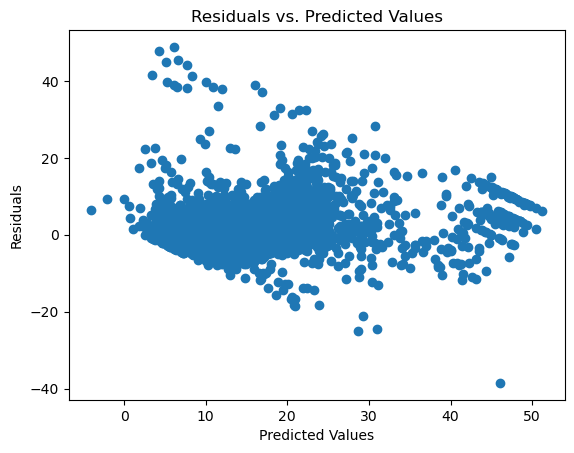

In [56]:
# pred_y = model.predict(X)
residuals = y_test_act - y_pred_norm
plt.scatter(y_pred_norm, residuals)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [57]:
long =list(train1['pickup_longitude'])

lat = list(train1["pickup_latitude"])




In [58]:
from geopy.geocoders import Nominatim

In [59]:
geolocator = Nominatim(user_agent="geoapiExercises")

In [60]:
# Latitude = "40.721319"
# Longitude = "-73.844311"
 
# location = []    
    
# for i , j in zip(lat,long):
#         print( geolocator.reverse(str(i)+","+str(j)))
 



In [61]:
# l= []
# for i , j in zip(lat[:10],long[:10]):
#     l.append(geolocator.reverse(str(i)+","+str(j)))

In [62]:
# for i , j in zip(lat,long):
#     print(geolocator.reverse(str(i)+","+str(j)))

## MSE of data

In [63]:
from sklearn.metrics import mean_squared_error
mse_testing = mean_squared_error(y_test_act, y_pred_norm)
mse_testing

17.727638449956736

In [64]:
x_train

array([[ 1.43244801e-01,  2.72846746e-01, -1.21601725e-01, ...,
         1.21962117e+00, -6.23501217e-01, -6.23501217e-01],
       [-8.06157403e-01, -5.94521578e-01, -9.62010185e-01, ...,
        -9.19430466e-01, -4.49134937e-01, -4.49134937e-01],
       [-5.15083992e-01, -7.99785564e-04, -3.98567523e-01, ...,
         1.21962117e+00, -5.86725468e-01, -5.86725468e-01],
       ...,
       [ 5.46135029e-01,  4.44447890e-01,  1.36635490e-01, ...,
         1.21962117e+00, -5.25208114e-01, -5.25208114e-01],
       [ 4.30016498e-01,  3.94176300e-01, -4.95615634e-01, ...,
         6.84858258e-01, -1.17853716e-01, -1.17853716e-01],
       [-6.62348045e-02,  5.27768071e-01, -1.47581029e-01, ...,
         1.50095350e-01, -5.42886306e-01, -5.42886306e-01]])

In [65]:
# y_pred = model.predict(x_test)
x_train_norm = scaler_in.inverse_transform(x_train).flatten()
x_train_norm

array([-7.39704070e+01,  4.07589700e+01, -7.39783170e+01, ...,
        2.01200000e+03,  7.91739997e-01,  1.27390966e+00])

In [66]:
y_train

array([[-0.47076425],
       [-0.70774071],
       [-0.69645612],
       ...,
       [-0.58361018],
       [ 0.9962329 ],
       [-0.43691047]])

In [67]:
y_train_norm = scaler_dep.inverse_transform(y_train.reshape(-1,1)).flatten()
y_train_norm

array([ 7. ,  4.9,  5. , ...,  6. , 20. ,  7.3])

In [68]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test_act,y_pred_norm)
print("accuracy  ", r2)

accuracy   0.7773745602095747


## random forest

In [69]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# df = pd.read_csv("dj.csv")


x = train1.drop(['key','pickup_datetime','pickup_weekday','fare_amount'],axis=1)
#  dependent variable
y = train1[['fare_amount']]

scaler_in = StandardScaler()

# fit the scaler to the data
scaler_in.fit(x)

# transform the data
x_scaled = scaler_in.transform(x)

#-----------------------------------------------------------------------------------------------------------


# fit the scaler to the data
scaler_dep = StandardScaler()
scaler_dep.fit(y)

# transform the data
y_scaled = scaler_dep.transform(y)


x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled,train_size=0.8, random_state=12345)


rf = RandomForestRegressor(n_estimators=100, max_depth=11, random_state=42)
t = rf.fit(x_train, y_train)

y_pred = t.predict(x_test)
y_pred_norm = scaler_dep.inverse_transform(y_pred.reshape(-1,1)).flatten()


import pickle
pickle.dump(t,open("model.pkl","wb"))
# type(df)


C:\Users\pawar\AppData\Local\Temp\ipykernel_10768\3989783342.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  t = rf.fit(x_train, y_train)


In [70]:
# y_test_act_norm = scaler_dep.inverse_transform(x_test)
y_test_act = scaler_dep.inverse_transform(y_test.reshape(-1,1)).flatten()

In [71]:
y_test_pred = scaler_dep.inverse_transform(y_scaled)
y_test_pred

array([[ 4.5],
       [16.9],
       [ 5.7],
       ...,
       [ 7.5],
       [ 6.9],
       [ 4.5]])

In [72]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test_act,y_pred_norm)
print("accuracy  ", r2)

accuracy   0.8556012540439589


(0.0, 100.0)

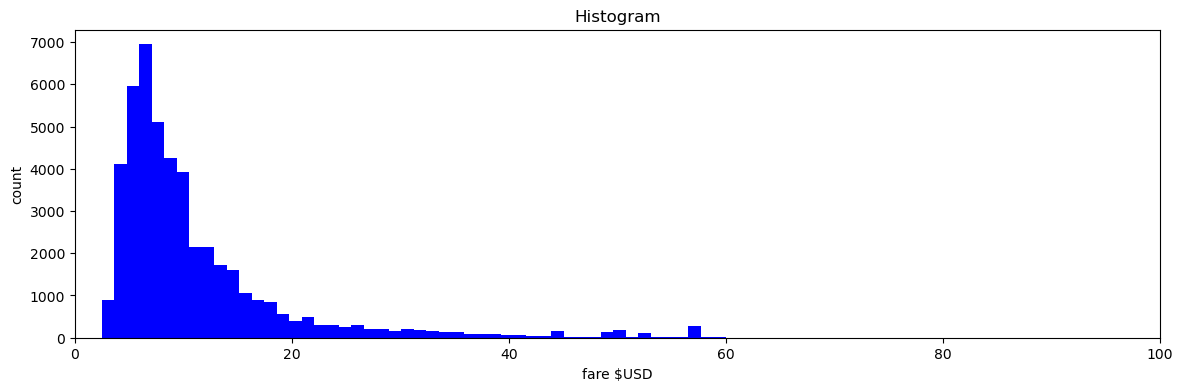

In [73]:
plt.figure(figsize=(14,4))
plt.hist(train1['fare_amount'],50,facecolor='blue')
plt.xlabel('fare $USD')
plt.title('Histogram')
plt.ylabel('count')
plt.xlim(0,100)

In [74]:
train1.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_month,pickup_day,year,distance,KM
fare_amount,1.000000,0.426259,-0.201785,0.382228,-0.158475,0.009174,-0.021010,-0.002014,-0.001406,0.128304,0.817056,0.817056
pickup_longitude,0.426259,1.000000,0.096238,0.275297,0.063757,0.001257,0.022100,0.000918,-0.031731,0.011326,0.491241,0.491241
pickup_latitude,-0.201785,0.096238,1.000000,0.079664,0.402482,-0.005624,0.030811,-0.000124,-0.047412,-0.015277,-0.088646,-0.088646
dropoff_longitude,0.382228,0.275297,0.079664,1.000000,0.179460,-0.002831,-0.051199,0.007647,-0.005046,0.005749,0.418150,0.418150
dropoff_latitude,-0.158475,0.063757,0.402482,0.179460,1.000000,-0.002097,0.016839,0.005234,-0.026937,-0.005453,-0.085305,-0.085305
passenger_count,0.009174,0.001257,-0.005624,-0.002831,-0.002097,1.000000,0.010545,0.006965,0.046417,-0.044165,0.008542,0.008542
pickup_hour,-0.021010,0.022100,0.030811,-0.051199,0.016839,0.010545,1.000000,-0.006821,-0.090358,0.004317,-0.032861,-0.032861
pickup_month,-0.002014,0.000918,-0.000124,0.007647,0.005234,0.006965,-0.006821,1.000000,0.007006,-0.011179,-0.001248,-0.001248
pickup_day,-0.001406,-0.031731,-0.047412,-0.005046,-0.026937,0.046417,-0.090358,0.007006,1.000000,0.006069,0.008316,0.008316
year,0.128304,0.011326,-0.015277,0.005749,-0.005453,-0.044165,0.004317,-0.011179,0.006069,1.000000,0.013276,0.013276


###### If your independent and dependent variables are negatively correlated, it means that they are inversely related. In other words, as the value of one variable increases, the value of the other variable decreases.

In the context of a regression analysis, a negative correlation between the independent and dependent variables means that there is a negative slope or a negative coefficient associated with the independent variable in the regression equation. This indicates that as the value of the independent variable increases, the predicted value of the dependent variable decreases.

It is important to note that a negative correlation between the independent and dependent variables does not necessarily imply causation. There could be other factors or variables that are affecting the relationship between the two variables. Therefore, it is important to conduct a thorough analysis to determine the causal factors and the direction of causality, if any.

A correlation coefficient of -0.01 indicates a very weak negative correlation between two variables. This means that there is a small, but negative relationship between the variables.

A correlation coefficient measures the strength and direction of the linear relationship between two variables. The coefficient ranges from -1 to 1, where a coefficient of -1 indicates a perfect negative correlation, a coefficient of 0 indicates no correlation, and a coefficient of 1 indicates a perfect positive correlation.



In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# 'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','pickup_day','pickup_month'

x = train1.drop(['key','pickup_datetime','pickup_weekday','fare_amount'],axis=1)
# # dependent variable
y = train1[['fare_amount']]

# sc = StandardScaler()
# x_train_sc = sc.fit_transform(x)
# y_train_sc = sc.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.8, random_state=12345)

# print(type(x_train))
# print(type(y_train))

In [76]:
# train1=pd.concat([train1,s],axis=1)


Text(0, 0.5, 'Dep')

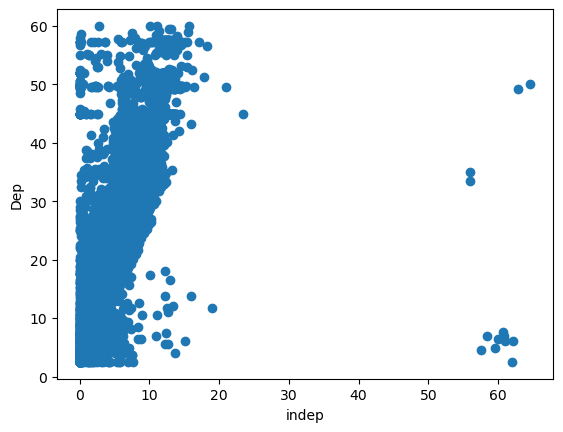

In [77]:
plt.scatter(x['distance'],y)
plt.xlabel("indep")
plt.ylabel("Dep")



In [78]:
# create a model
model = LinearRegression()

t = model.fit(x_train, y_train)

# predict the salaries for all the employees in the test data set
y_predictions = t.predict(x_test)
a = pd.DataFrame(y_predictions)
a

,0
0,12.025404
1,11.345919
2,11.691378
3,16.955252
4,11.380214
...,...
9421,7.003584
9422,7.937299
9423,7.509797
9424,6.030935


In [79]:
y_test

,fare_amount
38280,10.0
46156,11.7
41205,8.1
39476,18.0
16386,10.9
...,...
17815,6.1
5636,7.3
24538,7.0
8091,5.3


In [80]:
# from sklearn.metrics import mean_squared_error, r2_score

# # calculate mean squared error and R^2 score for the model predictions
# mse = mean_squared_error(y_test, y_predictions)
# r2 = r2_score(y_test, y_predictions)
# print("Mean squared error:", mse)
# print("R^2 score:", r2)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_predictions)
mse = mean_squared_error(y_test, y_predictions)
mae = mean_absolute_error(y_test, y_predictions)

print("R-squared:", r2*100)
# print("MSE:", mse)
# print("MAE:", mae)
rmse = np.sqrt(mse)
print("Rmse:", rmse)

R-squared: 55.89689011513952
Rmse: 5.892179787687034


In [81]:
# dfz

In [82]:
# y_test

In [83]:

# https://www.kaggle.com/competitions/new-york-city-taxi-fare-prediction/data

In [84]:
# from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.8, random_state=123456)

# from sklearn.preprocessing import PolynomialFeatures

# polynomial_features = PolynomialFeatures(degree=4)

In [85]:
# df0 = pd.DataFrame(y_pred_POLY)
# df0

In [86]:
# dfz = pd.concat([dft, dft0], axis=0)
# dfz.to_csv('my_pred159.csv', index=False)

In [87]:
# from sklearn.metrics import mean_squared_error, r2_score

# # calculate mean squared error and R^2 score for the model predictions
# mse = mean_squared_error(y_test, y_pred_POLY)

# print("Mean squared error:", mse)
# # print("R^2 score:", r_squared)

In [88]:
# pip install flask


In [89]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
np.mean(cross_val_score(lr, x_train, y_train, cv=5))

0.7354526922748803

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
R_Squared = np.mean(cross_val_score(rf, x_train, y_train,cv=4))
Standard_deviation = np.std(cross_val_score(rf, x_train, y_train,cv=4))
print('R2 of Random Forest Regression model is:',R_Squared)
print('Standard deviation of R2 of Random Forest Regression model is:',Standard_deviation)

C:\Users\pawar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\pawar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
